In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio 
from skimage.restoration import denoise_wavelet
import pywt

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams.update({'font.size' : 10})

In [ ]:
sample_rate, data = wavfile.read('assets_fish.wav') # Reading audio wave file
data = data/max(data) # Normalizing amplitude
length = data.shape[0] / sample_rate
time = np.linspace(0., length, data.shape[0])

In [ ]:
Audio(data=data, rate=sample_rate)

Text(0, 0.5, 'y(t)')

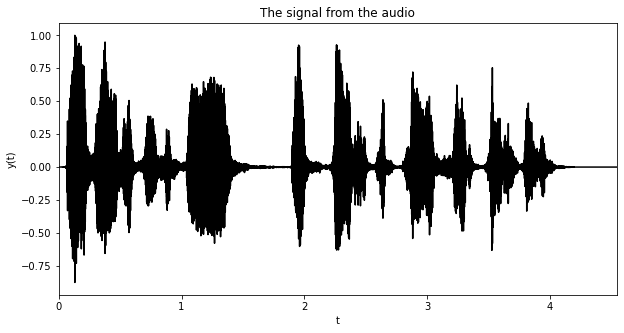

In [ ]:
plt.title('The signal from the audio')
plt.plot(time, data, color = 'k', LineWidth = 1.5)
plt.xlim(time[0], time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')

In [ ]:
sigma = 0.05
signal_noise = sigma * np.random.randn(data.size) 

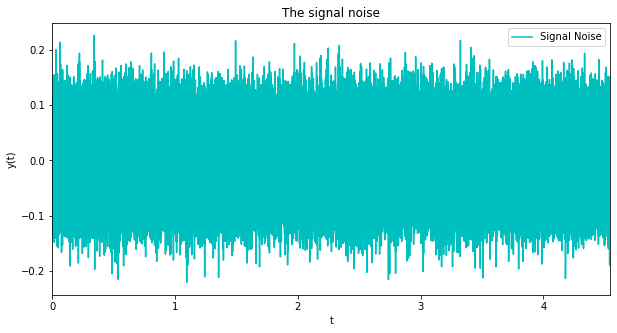

In [ ]:
plt.title('The signal noise')
plt.plot(time,signal_noise, color='c',LineWidth=1.5,label='Signal Noise')
plt.xlim(time[0], time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

In [ ]:
sigma = 0.05  # Noise variance
data_noisy = data + sigma * np.random.randn(data.size)   # Adding noise to audio 

Text(0, 0.5, 'y(t)')

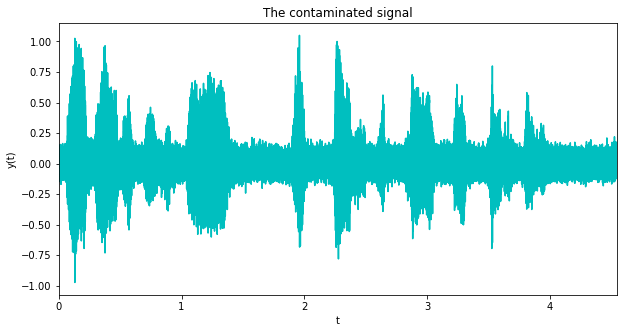

In [ ]:
plt.title('The contaminated signal')
plt.plot(time,data_noisy, color='c',LineWidth=1.5)
plt.xlim(time[0], time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')

In [ ]:
# Wavelet denoising
data_denoise = denoise_wavelet(data_noisy, method='VisuShrink', mode='soft', 
                               wavelet_levels=3, wavelet='db16', rescale_sigma='True')

In [ ]:
Audio(data=data_denoise, rate=sample_rate)

Text(0, 0.5, 'y(t)')

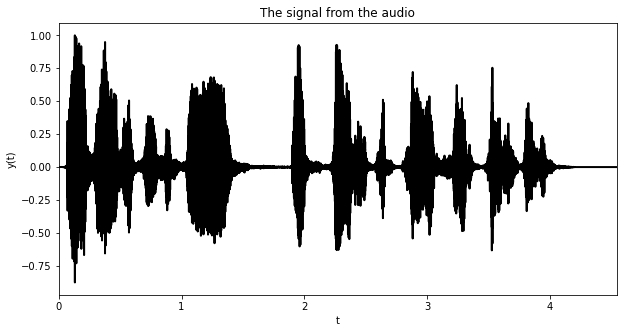

In [ ]:
plt.title('The signal from the audio')
plt.plot(time, data, color = 'k', LineWidth = 2)
plt.xlim(time[0], time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')

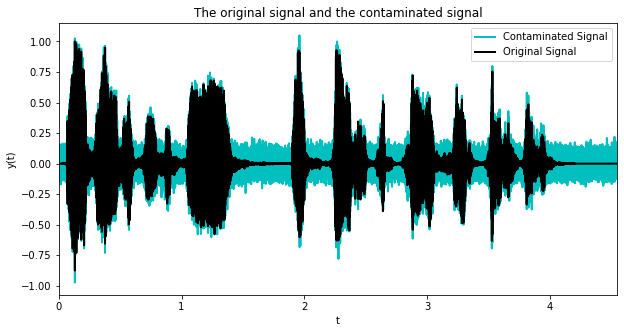

In [ ]:
plt.title('The original signal and the contaminated signal')
plt.plot(time,data_noisy, color='c',LineWidth=2,label='Contaminated Signal')
plt.plot(time,data, color='k', LineWidth=2,label='Original Signal')
plt.xlim(time[0], time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

Text(0, 0.5, 'y(t)')

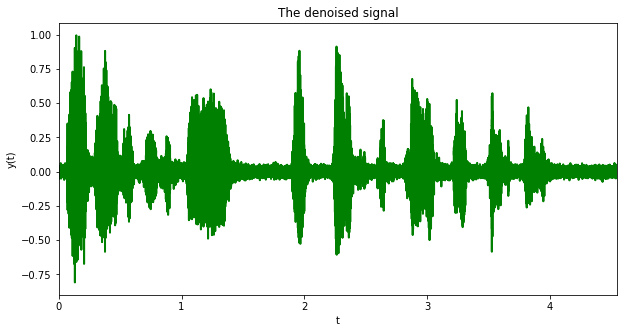

In [ ]:
plt.title('The denoised signal')
plt.plot(time,data_denoise,color='g',LineWidth=2,label='Denoised Signal')
plt.xlim(time[0],time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')

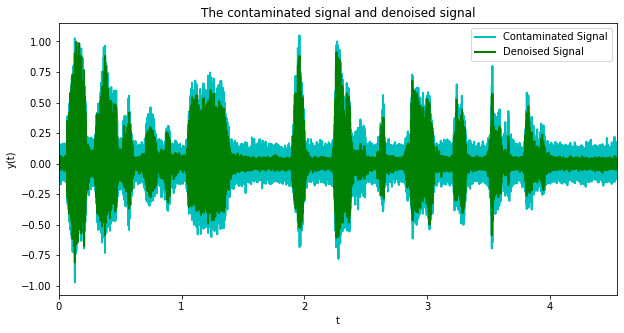

In [ ]:
plt.title('The contaminated signal and denoised signal')
plt.plot(time,data_noisy,color='c',LineWidth=2,label='Contaminated Signal')
plt.plot(time,data_denoise,color='g',LineWidth=2,label='Denoised Signal')
plt.xlim(time[0],time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

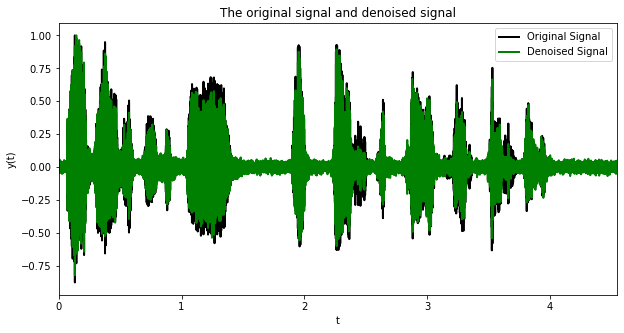

In [ ]:
plt.title('The original signal and denoised signal')
plt.plot(time,data,color='k',LineWidth=2,label='Original Signal')
plt.plot(time,data_denoise,color='g',LineWidth=2,label='Denoised Signal')
plt.xlim(time[0],time[-1])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()